Github code link:
https://github.com/shoman8/Stat6289

In [ ]:
from google.colab import drive
import sys
import os

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/Users/samuelhoman/Documents/STAT6289'

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([4, 3, 32, 32])


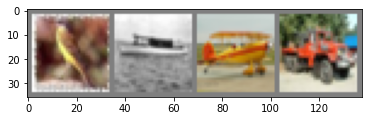

bird  ship  plane truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# Create a function that returns the accuracy of the model on the testing dataset.
def accuracy_function(model):

  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
  accuracy = (100* correct // total)
  return accuracy

In [ ]:
# Create a function that returns the accuracy of the model on the training dataset (for part c)
def accuracy_function_train(model):

  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in trainloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
  accuracy_train = (100* correct // total)
  return accuracy_train

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [ ]:
# Model 0 - Simple Dense with no Hidden Layers
class Model0(nn.Module):
  def __init__(self):
      super().__init__()
      self.linear = nn.Linear(3072, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = self.linear(x)
    return x
  
model0 = Model0()

In [ ]:
# Model 1 - Simple Dense with one Hidden Layers
class Model1(nn.Module):
  def __init__(self):
      super().__init__()
      self.inputlayer = nn.Linear(3072, 512)
      self.hiddenlayer = nn.Linear(512, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = F.relu(self.inputlayer(x))
    self.dropout = nn.Dropout(0.5)
    x = self.hiddenlayer(x)

    return x

model1 = Model1()

In [ ]:
# Model 2 - Simple Dense with two Hidden Layers
class Model2(nn.Module):
  def __init__(self):
      super().__init__()
      self.inputlayer = nn.Linear(3072, 512)
      self.hiddenlayer1 = nn.Linear(512, 512)
      self.hiddenlayer2 = nn.Linear(512, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = F.relu(self.inputlayer(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer1(x))
    self.dropout = nn.Dropout(0.5)
    x = self.hiddenlayer2(x)

    return x

model2 = Model2()

In [ ]:
# Model 3 - Simple Dense with three Hidden Layers
class Model3(nn.Module):
  def __init__(self):
      super().__init__()
      self.inputlayer = nn.Linear(3072, 512)
      self.hiddenlayer1 = nn.Linear(512, 512)
      self.hiddenlayer2 = nn.Linear(512, 512)
      self.hiddenlayer3 = nn.Linear(512, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = F.relu(self.inputlayer(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer1(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer2(x))
    self.dropout = nn.Dropout(0.5)
    x = self.hiddenlayer3(x)

    return x

model3 = Model3()

In [ ]:
# Model 4 - Simple Dense with four Hidden Layers
class Model4(nn.Module):
  def __init__(self):
      super().__init__()
      self.inputlayer = nn.Linear(3072, 512)
      self.hiddenlayer1 = nn.Linear(512, 512)
      self.hiddenlayer2 = nn.Linear(512, 512)
      self.hiddenlayer3 = nn.Linear(512, 512)
      self.hiddenlayer4 = nn.Linear(512, 10)

  def forward(self, x):
    x = torch.flatten(x,1)
    x = F.relu(self.inputlayer(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer1(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer2(x))
    self.dropout = nn.Dropout(0.5)
    x = F.relu(self.hiddenlayer3(x))
    self.dropout = nn.Dropout(0.5)
    x = self.hiddenlayer4(x)

    return x

model4 = Model4()

In [ ]:
# Define Criterion
criterion = nn.CrossEntropyLoss()
# Define the optimizers
optimizer_model0 = optim.SGD(model0.parameters(), lr=0.001, momentum=0.9)
optimizer_model1 = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)
optimizer_model2 = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
optimizer_model3 = optim.SGD(model3.parameters(), lr=0.001, momentum=0.9)
optimizer_model4 = optim.SGD(model4.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Train Model 0 - Simple Dense with no Hidden Layers
list_model0 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model0.zero_grad()

        # forward + backward + optimize
        outputs = model0(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model0.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model0)

    list_model0.append(["Model0", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.195
[1,  4000] loss: 2.165
[1,  6000] loss: 2.137
[1,  8000] loss: 2.155
[1, 10000] loss: 2.163
[1, 12000] loss: 2.141
Accuracy of the network on the 10000 test images: 34 %
[2,  2000] loss: 2.075
[2,  4000] loss: 2.088
[2,  6000] loss: 2.100
[2,  8000] loss: 2.125
[2, 10000] loss: 2.091
[2, 12000] loss: 2.139
Accuracy of the network on the 10000 test images: 33 %
[3,  2000] loss: 2.040
[3,  4000] loss: 2.043
[3,  6000] loss: 2.064
[3,  8000] loss: 2.092
[3, 10000] loss: 2.127
[3, 12000] loss: 2.108
Accuracy of the network on the 10000 test images: 34 %
[4,  2000] loss: 2.014
[4,  4000] loss: 2.047
[4,  6000] loss: 2.056
[4,  8000] loss: 2.084
[4, 10000] loss: 2.112
[4, 12000] loss: 2.088
Accuracy of the network on the 10000 test images: 33 %
[5,  2000] loss: 2.032
[5,  4000] loss: 2.058
[5,  6000] loss: 2.062
[5,  8000] loss: 2.039
[5, 10000] loss: 2.064
[5, 12000] loss: 2.087
Accuracy of the network on the 10000 test images: 32 %
[6,  2000] loss: 2.048
[6,  4000] l

In [ ]:
# Train Model 1 - Simple Dense with one Hidden Layers
list_model1 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model1.zero_grad()

        # forward + backward + optimize
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model1.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model1)

    list_model1.append(["Model1", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 1.841
[1,  4000] loss: 1.693
[1,  6000] loss: 1.644
[1,  8000] loss: 1.601
[1, 10000] loss: 1.578
[1, 12000] loss: 1.553
Accuracy of the network on the 10000 test images: 46 %
[2,  2000] loss: 1.473
[2,  4000] loss: 1.481
[2,  6000] loss: 1.470
[2,  8000] loss: 1.482
[2, 10000] loss: 1.485
[2, 12000] loss: 1.468
Accuracy of the network on the 10000 test images: 48 %
[3,  2000] loss: 1.360
[3,  4000] loss: 1.395
[3,  6000] loss: 1.414
[3,  8000] loss: 1.398
[3, 10000] loss: 1.408
[3, 12000] loss: 1.433
Accuracy of the network on the 10000 test images: 48 %
[4,  2000] loss: 1.296
[4,  4000] loss: 1.320
[4,  6000] loss: 1.320
[4,  8000] loss: 1.355
[4, 10000] loss: 1.343
[4, 12000] loss: 1.392
Accuracy of the network on the 10000 test images: 48 %
[5,  2000] loss: 1.241
[5,  4000] loss: 1.270
[5,  6000] loss: 1.292
[5,  8000] loss: 1.293
[5, 10000] loss: 1.311
[5, 12000] loss: 1.312
Accuracy of the network on the 10000 test images: 50 %
[6,  2000] loss: 1.176
[6,  4000] l

In [ ]:
# Train Model 2 - Simple Dense with two Hidden Layers
list_model2 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model2.zero_grad()

        # forward + backward + optimize
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model2)

    list_model2.append(["Model2", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 1.903
[1,  4000] loss: 1.717
[1,  6000] loss: 1.626
[1,  8000] loss: 1.576
[1, 10000] loss: 1.566
[1, 12000] loss: 1.504
Accuracy of the network on the 10000 test images: 48 %
[2,  2000] loss: 1.452
[2,  4000] loss: 1.424
[2,  6000] loss: 1.429
[2,  8000] loss: 1.398
[2, 10000] loss: 1.395
[2, 12000] loss: 1.360
Accuracy of the network on the 10000 test images: 51 %
[3,  2000] loss: 1.266
[3,  4000] loss: 1.278
[3,  6000] loss: 1.291
[3,  8000] loss: 1.299
[3, 10000] loss: 1.295
[3, 12000] loss: 1.296
Accuracy of the network on the 10000 test images: 52 %
[4,  2000] loss: 1.181
[4,  4000] loss: 1.191
[4,  6000] loss: 1.187
[4,  8000] loss: 1.205
[4, 10000] loss: 1.208
[4, 12000] loss: 1.191
Accuracy of the network on the 10000 test images: 53 %
[5,  2000] loss: 1.066
[5,  4000] loss: 1.096
[5,  6000] loss: 1.124
[5,  8000] loss: 1.120
[5, 10000] loss: 1.125
[5, 12000] loss: 1.135
Accuracy of the network on the 10000 test images: 53 %
[6,  2000] loss: 0.996
[6,  4000] l

In [ ]:
# Train Model 3 - Simple Dense with three Hidden Layers
list_model3 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model3.zero_grad()

        # forward + backward + optimize
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model3.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model3)

    list_model3.append(["Model3", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.008
[1,  4000] loss: 1.750
[1,  6000] loss: 1.670
[1,  8000] loss: 1.613
[1, 10000] loss: 1.585
[1, 12000] loss: 1.535
Accuracy of the network on the 10000 test images: 44 %
[2,  2000] loss: 1.443
[2,  4000] loss: 1.429
[2,  6000] loss: 1.446
[2,  8000] loss: 1.428
[2, 10000] loss: 1.413
[2, 12000] loss: 1.391
Accuracy of the network on the 10000 test images: 49 %
[3,  2000] loss: 1.270
[3,  4000] loss: 1.318
[3,  6000] loss: 1.322
[3,  8000] loss: 1.309
[3, 10000] loss: 1.292
[3, 12000] loss: 1.288
Accuracy of the network on the 10000 test images: 52 %
[4,  2000] loss: 1.194
[4,  4000] loss: 1.174
[4,  6000] loss: 1.218
[4,  8000] loss: 1.224
[4, 10000] loss: 1.214
[4, 12000] loss: 1.182
Accuracy of the network on the 10000 test images: 52 %
[5,  2000] loss: 1.091
[5,  4000] loss: 1.084
[5,  6000] loss: 1.105
[5,  8000] loss: 1.135
[5, 10000] loss: 1.136
[5, 12000] loss: 1.126
Accuracy of the network on the 10000 test images: 53 %
[6,  2000] loss: 0.988
[6,  4000] l

In [ ]:
# Train Model 4 - Simple Dense with four Hidden Layers
list_model4 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_model4.zero_grad()

        # forward + backward + optimize
        outputs = model4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_model4.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(model4)

    list_model4.append(["Model4", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.167
[1,  4000] loss: 1.831
[1,  6000] loss: 1.717
[1,  8000] loss: 1.668
[1, 10000] loss: 1.634
[1, 12000] loss: 1.580
Accuracy of the network on the 10000 test images: 46 %
[2,  2000] loss: 1.497
[2,  4000] loss: 1.452
[2,  6000] loss: 1.474
[2,  8000] loss: 1.454
[2, 10000] loss: 1.419
[2, 12000] loss: 1.416
Accuracy of the network on the 10000 test images: 49 %
[3,  2000] loss: 1.309
[3,  4000] loss: 1.339
[3,  6000] loss: 1.339
[3,  8000] loss: 1.321
[3, 10000] loss: 1.316
[3, 12000] loss: 1.316
Accuracy of the network on the 10000 test images: 50 %
[4,  2000] loss: 1.202
[4,  4000] loss: 1.230
[4,  6000] loss: 1.227
[4,  8000] loss: 1.219
[4, 10000] loss: 1.235
[4, 12000] loss: 1.231
Accuracy of the network on the 10000 test images: 52 %
[5,  2000] loss: 1.104
[5,  4000] loss: 1.142
[5,  6000] loss: 1.137
[5,  8000] loss: 1.129
[5, 10000] loss: 1.158
[5, 12000] loss: 1.132
Accuracy of the network on the 10000 test images: 53 %
[6,  2000] loss: 1.018
[6,  4000] l

In [ ]:
# Relu CNN with no Drop Out
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net1 = Net1()

In [ ]:
# Sigmoid CNN
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


net2 = Net2()

In [ ]:
# Relu CNN with Drop Out
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        self.dropout = nn.Dropout(0.5)
        x = F.relu(self.fc2(x))
        self.dropout = nn.Dropout(0.5)
        x = self.fc3(x)
        return x


net3 = Net3()

In [ ]:
# Define optimizers
optimizer_net1 = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)
optimizer_net2 = optim.SGD(net2.parameters(), lr=0.01,  momentum=0.9)
optimizer_net3 = optim.SGD(net3.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Train - Relu CNN with no Drop Out
list_net1 = []
list_net1_train = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net1.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net1.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(net1)
    accuracy_train = accuracy_function_train(net1)

    list_net1.append(["Net1", epoch+1, accuracy])
    list_net1_train.append(["Net1_Train", epoch+1, accuracy_train])

print('Finished Training')

[1,  2000] loss: 2.267
[1,  4000] loss: 1.871
[1,  6000] loss: 1.702
[1,  8000] loss: 1.604
[1, 10000] loss: 1.547
[1, 12000] loss: 1.480
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 49 %
[2,  2000] loss: 1.416
[2,  4000] loss: 1.368
[2,  6000] loss: 1.361
[2,  8000] loss: 1.351
[2, 10000] loss: 1.326
[2, 12000] loss: 1.289
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 55 %
[3,  2000] loss: 1.235
[3,  4000] loss: 1.226
[3,  6000] loss: 1.225
[3,  8000] loss: 1.199
[3, 10000] loss: 1.224
[3, 12000] loss: 1.180
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 60 %
[4,  2000] loss: 1.129
[4,  4000] loss: 1.126
[4,  6000] loss: 1.116
[4,  8000] loss: 1.122
[4, 10000] loss: 1.130
[4, 12000] loss: 1.116
Accuracy of the network on the 10000 test images: 58 %
Accuracy of the network on the 10000 test images: 63 %
[5,  200

In [ ]:
# Train Sigmoid CNN
list_net2 = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net2.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net2.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(net2)

    list_net2.append(["Net2", epoch+1, accuracy])

print('Finished Training')

[1,  2000] loss: 2.326
[1,  4000] loss: 2.310
[1,  6000] loss: 2.309
[1,  8000] loss: 2.309
[1, 10000] loss: 2.308
[1, 12000] loss: 2.307
Accuracy of the network on the 10000 test images: 10 %
[2,  2000] loss: 2.301
[2,  4000] loss: 2.160
[2,  6000] loss: 2.086
[2,  8000] loss: 2.046
[2, 10000] loss: 1.988
[2, 12000] loss: 1.885
Accuracy of the network on the 10000 test images: 31 %
[3,  2000] loss: 1.803
[3,  4000] loss: 1.761
[3,  6000] loss: 1.707
[3,  8000] loss: 1.659
[3, 10000] loss: 1.613
[3, 12000] loss: 1.590
Accuracy of the network on the 10000 test images: 40 %
[4,  2000] loss: 1.551
[4,  4000] loss: 1.487
[4,  6000] loss: 1.474
[4,  8000] loss: 1.469
[4, 10000] loss: 1.438
[4, 12000] loss: 1.420
Accuracy of the network on the 10000 test images: 49 %
[5,  2000] loss: 1.393
[5,  4000] loss: 1.396
[5,  6000] loss: 1.369
[5,  8000] loss: 1.362
[5, 10000] loss: 1.325
[5, 12000] loss: 1.330
Accuracy of the network on the 10000 test images: 52 %
[6,  2000] loss: 1.302
[6,  4000] l

In [ ]:
# Train Relu CNN with Drop Out
list_net3 = []
list_net3_train = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_net3.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_net3.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    accuracy = accuracy_function(net3)
    accuracy_train = accuracy_function_train(net3)

    list_net3.append(["Net3", epoch+1, accuracy])
    list_net3_train.append(["Net3_Train", epoch+1, accuracy_train])

print('Finished Training')

[1,  2000] loss: 2.171
[1,  4000] loss: 1.877
[1,  6000] loss: 1.697
[1,  8000] loss: 1.589
[1, 10000] loss: 1.542
[1, 12000] loss: 1.489
Accuracy of the network on the 10000 test images: 43 %
Accuracy of the network on the 10000 test images: 43 %
[2,  2000] loss: 1.412
[2,  4000] loss: 1.388
[2,  6000] loss: 1.371
[2,  8000] loss: 1.321
[2, 10000] loss: 1.300
[2, 12000] loss: 1.292
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 57 %
[3,  2000] loss: 1.209
[3,  4000] loss: 1.208
[3,  6000] loss: 1.215
[3,  8000] loss: 1.178
[3, 10000] loss: 1.193
[3, 12000] loss: 1.181
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 59 %
[4,  2000] loss: 1.087
[4,  4000] loss: 1.112
[4,  6000] loss: 1.121
[4,  8000] loss: 1.096
[4, 10000] loss: 1.093
[4, 12000] loss: 1.101
Accuracy of the network on the 10000 test images: 58 %
Accuracy of the network on the 10000 test images: 63 %
[5,  200

In [31]:
# Save results lists manually to protect from crashes.
#list_model0 = [["Model0", 1, 34],["Model0", 2, 33],["Model0", 3, 34],["Model0", 4, 33],["Model0", 5, 32],["Model0", 6, 34],["Model0", 7, 35],["Model0", 8, 31],["Model0", 9, 29],["Model0", 10, 34]]
#list_model1 = [["Model1", 1, 46],["Model1", 2, 48],["Model1", 3, 48],["Model1", 4, 48],["Model1", 5, 50],["Model1", 6, 49],["Model1", 7, 51],["Model1", 8, 49],["Model1", 9, 50],["Model1", 10, 51]]
#list_model2 = [["Model2", 1, 48],["Model2", 2, 51],["Model2", 3, 52],["Model2", 4, 53],["Model2", 5, 53],["Model2", 6, 53],["Model2", 7, 54],["Model2", 8, 54],["Model2", 9, 53],["Model2", 10, 54]]
#list_model3 = [["Model3", 1, 44],["Model3", 2, 49],["Model3", 3, 52],["Model3", 4, 52],["Model3", 5, 53],["Model3", 6, 54],["Model3", 7, 54],["Model3", 8, 55],["Model3", 9, 54],["Model3", 10, 54]]
#list_model4 = [["Model4", 1, 46],["Model4", 2, 49],["Model4", 3, 50],["Model4", 4, 52],["Model4", 5, 53],["Model4", 6, 53],["Model4", 7, 55],["Model4", 8, 54],["Model4", 9, 54],["Model4", 10, 54]]
#list_net1 = [["Net1", 1, 48],["Net1", 2, 54],["Net1", 3, 57],["Net1", 4, 58],["Net1", 5, 60],["Net1", 6, 60],["Net1", 7, 62],["Net1", 8, 62],["Net1", 9, 62],["Net1", 10, 61]]
#list_net1_train = [["Net1_Train", 1, 49],["Net1_Train", 2, 55],["Net1_Train", 3, 60],["Net1_Train", 4, 63],["Net1_Train", 5, 66],["Net1_Train", 6, 67],["Net1_Train", 7, 70],["Net1_Train", 8, 71],["Net1_Train", 9, 72],["Net1_Train", 10, 72]]
#list_net2 = [["Net2", 1, 10],["Net2", 2, 31],["Net2", 3, 40],["Net2", 4, 49],["Net2", 5, 52],["Net2", 6, 55],["Net2", 7, 58],["Net2", 8, 58],["Net2", 9, 60],["Net2", 10, 61]]
#list_net3 = [["Net3", 1, 43],["Net3", 2, 54],["Net3", 3, 56],["Net3", 4, 58],["Net3", 5, 62],["Net3", 6, 60],["Net3", 7, 61],["Net3", 8, 62],["Net3", 9, 62],["Net3", 10, 61]]
#list_net3_train = [["Net3_Train", 1, 43],["Net3_Train", 2, 57],["Net3_Train", 3, 59],["Net3_Train", 4, 63],["Net3_Train", 5, 68],["Net3_Train", 6, 68],["Net3_Train", 7, 69],["Net3_Train", 8, 70],["Net3_Train", 9, 73],["Net3_Train", 10, 73]]

In [32]:
# Combine List of Results
list_models = [list_net1, list_net1_train, list_net2, list_net3, list_net3_train, list_model0, list_model1, list_model2, list_model3, list_model4]

In [33]:
# Create Dataframe of Results
import pandas as pd
model_results = pd.DataFrame()
for model in list_models:
  scores = []
  name = model[0][0]
  for epoch in model:
    scores.append(epoch[2])
  model_results[name] = pd.Series(scores)

model_results.head()

,Net1,Net1_Train,Net2,Net3,Net3_Train,Model0,Model1,Model2,Model3,Model4
0,48,49,10,43,43,34,46,48,44,46
1,54,55,31,54,57,33,48,51,49,49
2,57,60,40,56,59,34,48,52,52,50
3,58,63,49,58,63,33,48,53,52,52
4,60,66,52,62,68,32,50,53,53,53


In [46]:
cnn_epochs = [1,2,3,4,5,6,7,8,9,10]

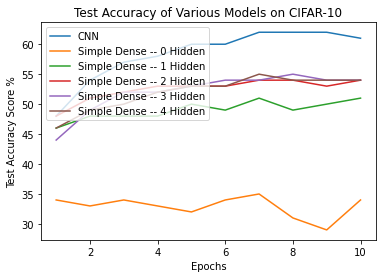

In [47]:
# Produce Plot for part a.
plt.plot(cnn_epochs, model_results['Net1'], label = 'CNN')
plt.plot(cnn_epochs, model_results['Model0'], label = 'Simple Dense -- 0 Hidden')
plt.plot(cnn_epochs, model_results['Model1'], label = 'Simple Dense -- 1 Hidden')
plt.plot(cnn_epochs, model_results['Model2'], label = 'Simple Dense -- 2 Hidden')
plt.plot(cnn_epochs, model_results['Model3'], label = 'Simple Dense -- 3 Hidden')
plt.plot(cnn_epochs, model_results['Model4'], label = 'Simple Dense -- 4 Hidden')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of Various Models on CIFAR-10")
plt.legend(loc="upper left")
plt.show()

The convolutional neural network outperforms all of the simple dense models.  This is because the CNN uses the same set of kernels across the entire image (translation invariance).  This results in the number of parameters and "variance" from a bias-variance point of view.  Ultimately, CNN learns features which allows it to perform well.  The best simple dense model is the model with two hidden layers.  This is because it strikes the best balance between overfitting and underfitting the data.  By the time we get to three hidden layers, we are potentially starting to overfit to the training data and thus lose predictive power with the testing data.  Thus, simple dense with 2 hidden layers stikes the best balance within the bias-variance tradeoff.

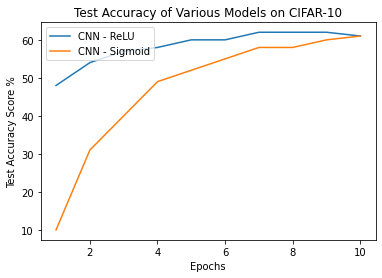

In [48]:
# Produce Plot for part b.
plt.plot(cnn_epochs, model_results['Net1'], label = 'CNN - ReLU')
plt.plot(cnn_epochs, model_results['Net2'], label = 'CNN - Sigmoid')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of Various Models on CIFAR-10")
plt.legend(loc="upper left")
plt.show()

The ReLU function outperforms the sigmoid function.  This is primarily due to the issue of vanishing gradient descent.  The sigmoid function is easy to saturate while ReLU is only saturated when the input is less than zero.  Since saturation is bad for learning, ReLU will generally outperform sigmoid.  Moreove, the ReLU converges faster than the sigmoid activation, which is great when there are many layers.

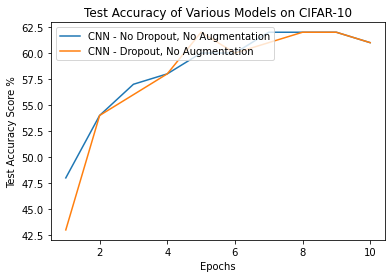

In [49]:
# Produce plot 1 for part c) - testing dataset
plt.plot(cnn_epochs, model_results['Net1'], label = 'CNN - No Dropout, No Augmentation')
plt.plot(cnn_epochs, model_results['Net3'], label = 'CNN - Dropout, No Augmentation')

plt.xlabel("Epochs")
plt.ylabel("Test Accuracy Score %")
plt.title("Test Accuracy of Various Models on CIFAR-10")
plt.legend(loc="upper left")
plt.show()

The non-drop out model outperforms the drop out model with the testing data.  The primary purpose of drop out is to prevent over-fitting.  Given that the non-drop out model was better, then we know that over-fitting was not an issue; this corroborates our findings with the simple dense networks.  Drop out also allows the network to learn more features rather than develop co-dependency amongst each other during training. However, it requires more iterations to converge.  The results are consistent with the theory.

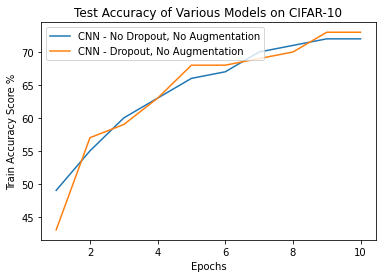

In [50]:
# Produce plot 2 for part c) - training dataset
plt.plot(cnn_epochs, model_results['Net1_Train'], label = 'CNN - No Dropout, No Augmentation')
plt.plot(cnn_epochs, model_results['Net3_Train'], label = 'CNN - Dropout, No Augmentation')

plt.xlabel("Epochs")
plt.ylabel("Train Accuracy Score %")
plt.title("Test Accuracy of Various Models on CIFAR-10")
plt.legend(loc="upper left")
plt.show()

The results are very similar when comparing the networks using the training data.  The accuracies are better which is expected.  The non-dropout network still outperforms the drop out network, but the difference is much smaller.